In [7]:
import numpy as np
import Qconfig
from qiskit import BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,execute, compile

In [8]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.measure(qr, cr)

backend = BasicAer.get_backend('qasm_simulator')
qobj = compile(qc, backend, shots=2000)
job = backend.run(qobj)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 504, '00': 490, '10': 489, '01': 517}


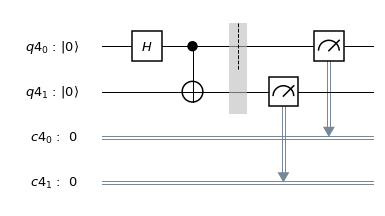

In [9]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit from the quantum and classical registers
circ = QuantumCircuit(qr, cr)

# Place Hadamard gate on the top wire, putting this qubit in a superposition.
circ.h(qr[0])

# Add a CX (CNOT) gate across the top two wires, entangling the qubits.
circ.cx(qr[0], qr[1])

# Create a barrier that separates the gates from the measurements
circ.barrier(qr)

# Measure the qubits into the classical registers
circ.measure(qr, cr)

# Draw the new circuit
circ.draw(output='mpl')

In [10]:
from qiskit import BasicAer

backend_sv_sim = BasicAer.get_backend('statevector_simulator')

# Execute the circuit on the state vector simulator
job_sim = execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector in a manner that contains a comma-delimited string.
quantum_state

array([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j])

In [16]:
circ

In [27]:
# Create a Quantum Register with 1 qubit (wire).
qr = QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = QuantumCircuit(qr, cr)

# Place an X gate on the qubit wire. The registers are zero-indexed.
circ.x(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')



{'1': 100}


In [29]:
# Import BasicAer
from qiskit import BasicAer

# Use BasicAer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)



{'1': 100}


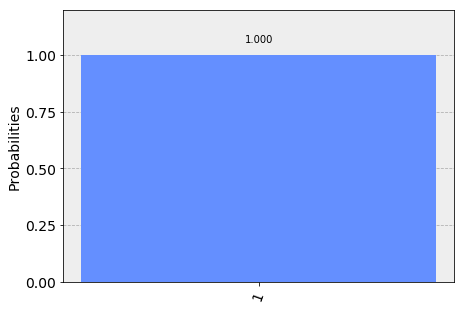

In [28]:
from qiskit.tools.visualization import plot_histogram

# Plot the results on a bar chart
plot_histogram(counts)
